In [468]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [469]:
import matplotlib.pyplot as plt

In [470]:
# fetching the training data set
train_data = pd.read_csv(r"ALS_TrainingData_2223.csv")
train_data.drop_duplicates(inplace=True)
train_data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [471]:
# fetching the testing data set
test_data = pd.read_csv(r"ALS_TestingData_78.csv")
test_data.drop_duplicates(inplace=True)
test_data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [472]:
print(f"train data size: {train_data.shape}")
print(f"test data size: {test_data.shape}")

train data size: (2223, 101)
test data size: (78, 131)


In [473]:
cols = list(train_data.columns)
cols #listing columns

['ID',
 'Age_mean',
 'Albumin_max',
 'Albumin_median',
 'Albumin_min',
 'Albumin_range',
 'ALSFRS_slope',
 'ALSFRS_Total_max',
 'ALSFRS_Total_median',
 'ALSFRS_Total_min',
 'ALSFRS_Total_range',
 'ALT.SGPT._max',
 'ALT.SGPT._median',
 'ALT.SGPT._min',
 'ALT.SGPT._range',
 'AST.SGOT._max',
 'AST.SGOT._median',
 'AST.SGOT._min',
 'AST.SGOT._range',
 'Bicarbonate_max',
 'Bicarbonate_median',
 'Bicarbonate_min',
 'Bicarbonate_range',
 'Blood.Urea.Nitrogen..BUN._max',
 'Blood.Urea.Nitrogen..BUN._median',
 'Blood.Urea.Nitrogen..BUN._min',
 'Blood.Urea.Nitrogen..BUN._range',
 'bp_diastolic_max',
 'bp_diastolic_median',
 'bp_diastolic_min',
 'bp_diastolic_range',
 'bp_systolic_max',
 'bp_systolic_median',
 'bp_systolic_min',
 'bp_systolic_range',
 'Calcium_max',
 'Calcium_median',
 'Calcium_min',
 'Calcium_range',
 'Chloride_max',
 'Chloride_median',
 'Chloride_min',
 'Chloride_range',
 'Creatinine_max',
 'Creatinine_median',
 'Creatinine_min',
 'Creatinine_range',
 'Gender_mean',
 'Glucose_ma

In [474]:
# getting the suffix and prefix of the dataset
def get_attr(attr):
    dist_val = {}
    for col in cols:
        if len(col.split("_")) >=2 and col.split("_")[attr] not in dist_val:
            dist_val[col.split("_")[attr]] = 1
    print(dist_val)
get_attr(1) #getting the suffix to analyse data

{'mean': 1, 'max': 1, 'median': 1, 'min': 1, 'range': 1, 'slope': 1, 'Total': 1, 'diastolic': 1, 'systolic': 1, 'delta': 1, 'site': 1}


In [475]:
get_attr(0) #getting the prefix to analyse data

{'Age': 1, 'Albumin': 1, 'ALSFRS': 1, 'ALT.SGPT.': 1, 'AST.SGOT.': 1, 'Bicarbonate': 1, 'Blood.Urea.Nitrogen..BUN.': 1, 'bp': 1, 'Calcium': 1, 'Chloride': 1, 'Creatinine': 1, 'Gender': 1, 'Glucose': 1, 'hands': 1, 'Hematocrit': 1, 'Hemoglobin': 1, 'leg': 1, 'mouth': 1, 'onset': 1, 'Platelets': 1, 'Potassium': 1, 'pulse': 1, 'respiratory': 1, 'Sodium': 1, 'trunk': 1, 'Urine.Ph': 1}


In [476]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [477]:
train_data.describe

<bound method NDFrame.describe of         ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        1        65         57.0            40.5         38.0       0.066202   
1        2        48         45.0            41.0         39.0       0.010453   
2        3        38         50.0            47.0         45.0       0.008929   
3        4        63         47.0            44.0         41.0       0.012111   
4        5        63         47.0            45.5         42.0       0.008292   
...    ...       ...          ...             ...          ...            ...   
2218  2419        33         50.0            49.0         45.0       0.008772   
2219  2420        61         47.0            45.0         42.0       0.009074   
2220  2421        47         46.0            44.0         41.0       0.012111   
2221  2422        37         49.0            44.0         39.0       0.017857   
2222  2424        48         48.0            45.0         40.0       0.0184

In [478]:
# extracting feature variables for train_data
rows = min(train_data.shape[0], test_data.shape[0]) # taking the min() func, as the index has to match for both test and train data
X_train = train_data.iloc[0:rows,1:4] # took first 3 cols as features, ignoring ID
X_train = StandardScaler().fit_transform(X_train) # scaling the values for accurate performance
X_train[0:5,] # data values for first 5 rows

array([[ 0.89084543,  3.39702041, -1.53659498],
       [-0.53407742, -0.78943266, -1.32558369],
       [-1.37226732,  0.95492279,  1.20655169],
       [ 0.72320745, -0.09169048, -0.059516  ],
       [ 0.72320745, -0.09169048,  0.57351784]])

In [479]:
# extracting feature variables for test_data
X_test = test_data.iloc[0:rows,1:4].values # took first 3 cols as features, ignoring ID
X_test = StandardScaler().fit_transform(X_test) # scaling the values for accurate performance
X_test[0:5,] # data values for first 5 rows 

array([[ 0.94584957,  0.24485219,  0.59634916],
       [-0.19389042, -2.06013565, -2.01503243],
       [ 0.03531638,  0.24485219,  0.26992646],
       [ 1.58836291,  1.5619881 ,  0.10671511],
       [ 0.85904471, -0.08443179, -0.05649624]])

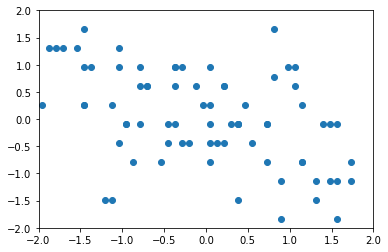

In [480]:
#visualization of the training data in 2D

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

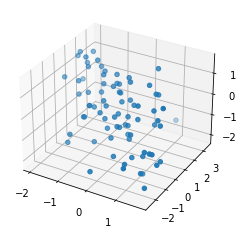

In [481]:
#visualization of the training data in 3D for 3 features
ax = plt.axes(projection='3d')
# xline = np.linspace(-2, 2, 100)
# yline = np.linspace(-2, 2, 100)
# zline = np.linspace(-2, 2, 100)
# ax.plot3D(xline, yline, zline, 'black')
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2])
# plt.scatter(X_train[:, 0], X_train[:, 1])
# plt.xlim([-2,2])
# plt.ylim([-2,2])
plt.show()

In [448]:
from sklearn.cluster import KMeans

In [449]:
# TRAINING THE DATA FOR K = 3

kmeans = KMeans(3, init = 'k-means++', random_state = 0, max_iter=24)
kmeans.fit(X_train)

KMeans(max_iter=24, n_clusters=3, random_state=0)

In [450]:
# TESTING THE DATA

predictions = kmeans.predict(X_test)

In [451]:
predictions

array([0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2])

In [452]:
# getting the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 0.23508509,  0.10839735,  0.01495857],
       [ 0.72739839, -1.26040862, -1.28338144],
       [-0.93920254,  0.89677761,  1.04829323]])

In [453]:
# getting the labels of data
kmeans.labels_

array([0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [454]:
# To evaluate the performance evaluation for K = 3
silhouette_avg_3 = silhouette_score(X_train, predictions)
silhouette_avg_3

-0.05625186858210456

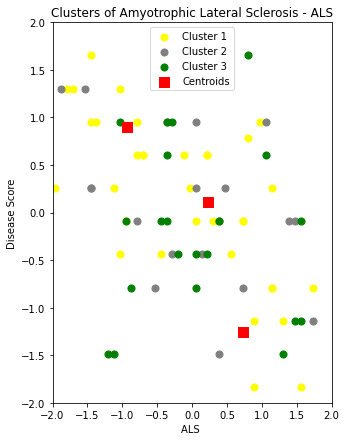

In [455]:
# Visualizing the dataset by displaying centroids for 3 clusters in 2D

# plt.scatter(X_train[:, 0], X_train[:, 1], c = output, s = 20, cmap = 'summer')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
# plt.show()

def visualize_3(x, y):
    plt.figure(figsize=(5,7))
    plt.scatter(X_train[predictions == 0, x], X_train[predictions == 0, y], color = 'yellow', label = 'Cluster 1',s=50)
    plt.scatter(X_train[predictions == 1, x], X_train[predictions == 1, y], color = 'grey', label = 'Cluster 2',s=50)
    plt.scatter(X_train[predictions == 2, x], X_train[predictions == 2, y], color = 'green', label = 'Cluster 3',s=50)

    plt.scatter(cluster_centers[:, x], cluster_centers[:, y], color = 'red', 
                    label = 'Centroids',s=120,marker=',')

    plt.grid(False)
    plt.title('Clusters of Amyotrophic Lateral Sclerosis - ALS')
    plt.xlabel('ALS ')
    plt.ylabel('Disease Score')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.legend()
    plt.show()

visualize_3(0,1)

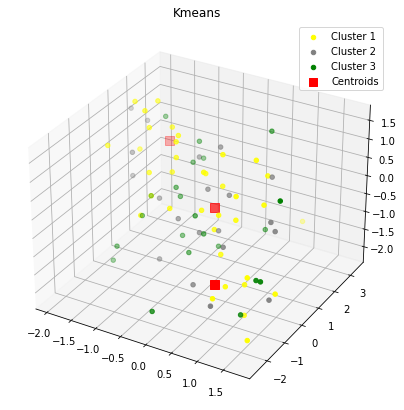

In [456]:
# Visualizing the dataset by displaying centroids for 3 clusters in 3D
plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
# xline = np.linspace(-2, 2, 100)
# yline = np.linspace(-2, 2, 100)
# zline = np.linspace(-2, 2, 100)
# ax.plot3D(xline)
ax.scatter3D(X_train[predictions == 0,0], X_train[predictions == 0,1], X_train[predictions == 0,2], c='yellow', label = 'Cluster 1')
ax.scatter3D(X_train[predictions == 1,0], X_train[predictions == 1,1], X_train[predictions == 1,2],c ='grey', label = 'Cluster 2')
ax.scatter3D(X_train[predictions == 2,0], X_train[predictions == 2,1], X_train[predictions == 2,2],c ='green', label = 'Cluster 3')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], color = 'red', marker=',', label = 'Centroids', s=80)
plt.legend()
plt.title("Kmeans")
plt.show()

In [457]:
# TRAINING THE DATA FOR K = 4

kmeans_4 = KMeans(4, init = 'k-means++', random_state = 0, max_iter=24)
kmeans_4.fit(X_train)

KMeans(max_iter=24, n_clusters=4, random_state=0)

In [458]:
# TESTING THE DATA

predictions_4 = kmeans_4.predict(X_test)
predictions_4

array([2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 3, 2, 2, 2, 2, 3, 0, 3, 1, 1, 1, 2,
       3, 1, 1, 2, 2, 2, 2, 2, 0, 1, 3, 3, 3, 3, 1, 2, 2, 1, 0, 2, 2, 0,
       1, 3, 3, 2, 0, 2, 3, 3, 2, 3, 2, 1, 3, 3, 3, 2, 3, 0, 1, 1, 2, 0,
       0, 3, 0, 0, 3, 0, 0, 3, 0, 2, 1, 0])

In [459]:
# getting the cluster centers
cluster_centers_4 = kmeans_4.cluster_centers_
cluster_centers_4

array([[-1.12480173,  0.87185824,  1.00558856],
       [ 1.14828947, -1.38749738, -1.4160171 ],
       [ 0.70997287,  0.61523252,  0.47356513],
       [-0.24769586, -0.44056157, -0.42878575]])

In [460]:
# getting the labels of data
kmeans_4.labels_

array([2, 3, 0, 2, 2, 0, 3, 3, 0, 1, 1, 0, 3, 0, 0, 2, 1, 2, 0, 1, 3, 0,
       1, 3, 0, 1, 3, 1, 3, 3, 2, 2, 1, 0, 1, 3, 2, 0, 0, 0, 3, 0, 3, 3,
       2, 2, 2, 0, 2, 3, 1, 0, 3, 0, 1, 3, 3, 0, 1, 2, 2, 3, 2, 0, 0, 0,
       2, 2, 3, 3, 2, 1, 3, 2, 3, 1, 3, 3])

In [461]:
# To evaluate the performance evaluation for K = 4
silhouette_avg_4 = silhouette_score(X_train, predictions_4)
silhouette_avg_4

-0.09838728462161093

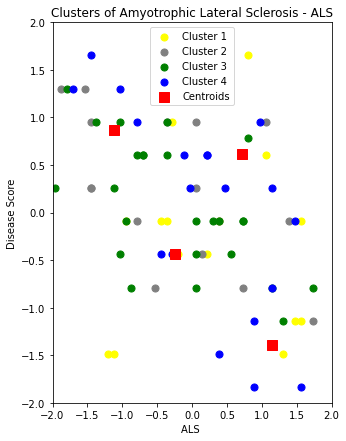

In [462]:
# Visualizing the dataset by displaying centroids for 4 clusters in 2D

def visualize_4(x, y):
    plt.figure(figsize=(5,7))
    plt.scatter(X_train[predictions_4 == 0, x], X_train[predictions_4 == 0, y], color = 'yellow', label = 'Cluster 1',s=50)
    plt.scatter(X_train[predictions_4 == 1, x], X_train[predictions_4 == 1, y], color = 'grey', label = 'Cluster 2',s=50)
    plt.scatter(X_train[predictions_4 == 2, x], X_train[predictions_4 == 2, y], color = 'green', label = 'Cluster 3',s=50)
    plt.scatter(X_train[predictions_4 == 3, x], X_train[predictions_4 == 3, y], color = 'blue', label = 'Cluster 4',s=50)

    plt.scatter(cluster_centers_4[:, x], cluster_centers_4[:, y], color = 'red', 
                    label = 'Centroids',s=120,marker=',')

    plt.grid(False)
    plt.title('Clusters of Amyotrophic Lateral Sclerosis - ALS')
    plt.xlabel('ALS ')
    plt.ylabel('Disease Score')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.legend()
    plt.show()

visualize_4(0,1)

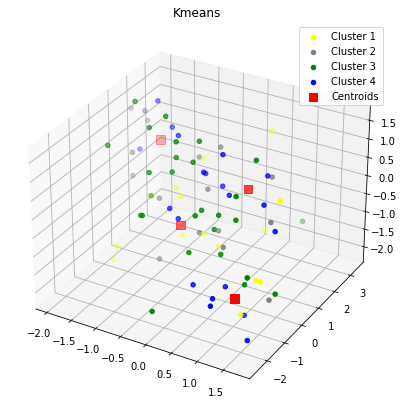

In [463]:
# Visualizing the dataset by displaying centroids for 4 clusters in 3D
plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
# xline = np.linspace(-2, 2, 100)
# yline = np.linspace(-2, 2, 100)
# zline = np.linspace(-2, 2, 100)
# ax.plot3D(xline)
ax.scatter3D(X_train[predictions_4 == 0,0], X_train[predictions_4 == 0,1], X_train[predictions_4 == 0,2], c='yellow', label = 'Cluster 1')
ax.scatter3D(X_train[predictions_4 == 1,0], X_train[predictions_4 == 1,1], X_train[predictions_4 == 1,2],c ='grey', label = 'Cluster 2')
ax.scatter3D(X_train[predictions_4 == 2,0], X_train[predictions_4 == 2,1], X_train[predictions_4 == 2,2],c ='green', label = 'Cluster 3')
ax.scatter3D(X_train[predictions_4 == 3,0], X_train[predictions_4 == 3,1], X_train[predictions_4 == 3,2],c ='blue', label = 'Cluster 4')
ax.scatter(cluster_centers_4[:, 0], cluster_centers_4[:, 1], cluster_centers_4[:, 2], color = 'red', marker=',', label = 'Centroids', s=80)
plt.legend()
plt.title("Kmeans")
plt.show()